## SAC420 ACTUARIAL PROJECT
### HEALTH INSURANCE CLAIMS PREDICTION USING MACHINE LEARNING TECHNIQUES

#### About the Dataset
age : age of policyholder

sex: gender of policy holder (female=0, male=1)

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 steps: average walking steps per day of policyholder

children: number of children / dependents of policyholder

smoker: smoking state of policyholder (non-smoke=0;smoker=1)

region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)

charges: individual medical costs billed by health insurance

insuranceclaim: yes=1, no=0


In [1]:
#Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import spearmanr, pearsonr, norm
import itertools
import dataframe_image as dfi
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, 
                             confusion_matrix, classification_report, precision_score, recall_score)

In [2]:
#load the data
os.chdir("C:/Users/HP/Desktop/4th Year Project/ML Project")

#data = pd.read_csv("C:/Users/HP/Desktop/4th Year Project/Insurance Claim Prediction Dataset.csv")
#data.head()

raw_data = pd.read_csv("Complete Raw Insurance Claim Dataset.csv")
raw_data.head()

#save head as .png
dfi.export(raw_data.head(), "rawdatahead.png")

In [3]:
#check at some properties of the dataset
print(raw_data.shape)
print(raw_data.info())

#The data has 8 columns and 1338 rows.
#All the columns have numerical values

(1338, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   object 
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   object 
 5   region          1338 non-null   object 
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB
None


### Exploratory Data Analysis
#### Visualizations
##### A picture is better than a thousand words

In [4]:
raw_data[["age", "bmi", "charges"]].describe()

#The age of policyholders is between 18 and 64 years
#The mean age is 39 years and standard deviation of 14 years

#The bmi of policyholders is between 15.96 and 53.13
#The mean bmi is 30.66 and standard deviation of 6.10

#The amount of premium the policyholders are charged is between $1121.87 and $63770.43
#The mean age is $13270.42 and standard deviation of $12110.01

#save head as .png
dfi.export(raw_data[["age", "bmi", "charges"]].describe(), "summarynumerical.png")

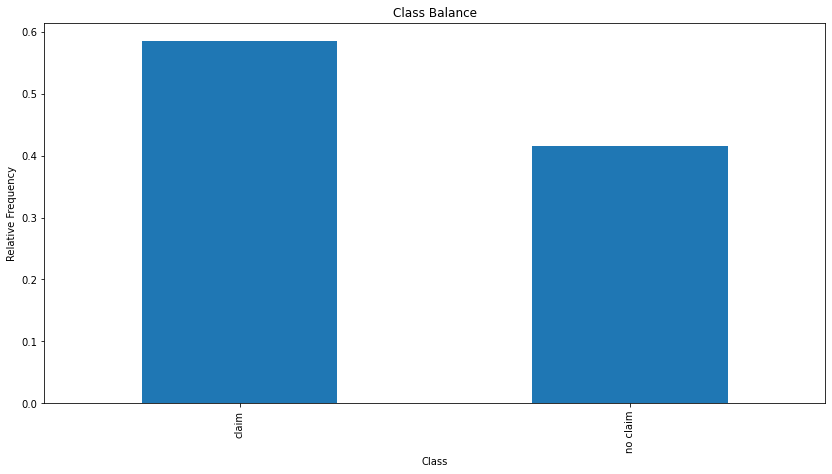

In [5]:
#A bar chart of the value counts of insurance claim
# Plot value counts of `"insuranceclaim"`
fig, ax = plt.subplots(figsize=(14, 7))
raw_data["insuranceclaim"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

#Positive class accounts for almost 60% of the observations while the negative class accounts for approximately 40% 
#of the observations.
#The majority class is the positive class (insurance claim)
#Minority class is the negative class (no insurance claim)

#save the figure
plt.savefig("classbalance.png")

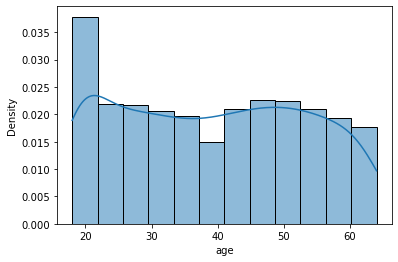

In [6]:
#age distribution
fig, ax = plt.subplots()

sns.histplot(raw_data.age, stat="density", ax=ax, kde=True)

plt.show();

fig.savefig("agedistributionplot.png")

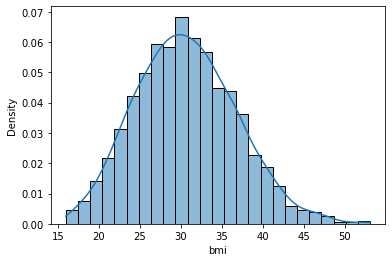

In [7]:
#bmi distribution
fig, ax = plt.subplots()

sns.histplot(raw_data.bmi, stat="density", ax=ax, kde=True)

plt.show();

fig.savefig("bmidistributionplot.png")

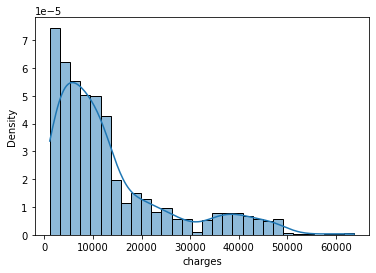

In [8]:
#charges distribution
fig, ax = plt.subplots()

sns.histplot(raw_data.charges, stat="density", ax=ax, kde=True)

plt.show();

fig.savefig("chargesdistributionplot.png")

In [ ]:
###Skip next cell

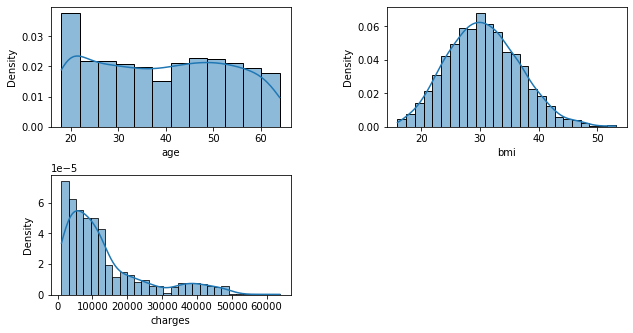

In [10]:
#Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.histplot(raw_data.age, stat="density", ax=axes[0, 0], kde=True)
sns.histplot(raw_data.bmi, stat="density", ax=axes[0, 1], kde=True)
sns.histplot(raw_data.charges, stat="density", ax=axes[1, 0], kde=True)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fig.delaxes(axes[1, 1])
plt.show();

fig.savefig("distributionplots.png")

#Age is approximately uniformly distributed
#The bmi of policyholders is normally distributed
#The amount of charges that the policyholders pay to the insurer are skewed to the right. There are a higher number of premiums that are below $20000

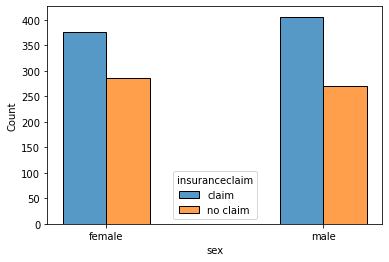

In [11]:
#sex barplot
fig, ax = plt.subplots()

sns.histplot(x='sex', hue='insuranceclaim', data=raw_data, multiple="dodge", ax = ax, shrink=.4)

plt.show();

fig.savefig("sexbarplot.png")

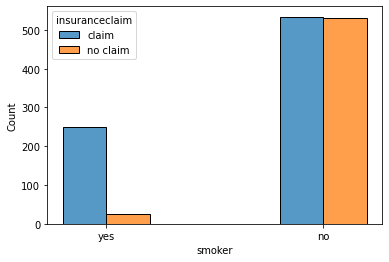

In [12]:
#smoker status barplot
fig, ax = plt.subplots()

sns.histplot(x='smoker', hue='insuranceclaim', data=raw_data, multiple="dodge", ax = ax, shrink=.4)

plt.show();

fig.savefig("smokerbarplot.png")

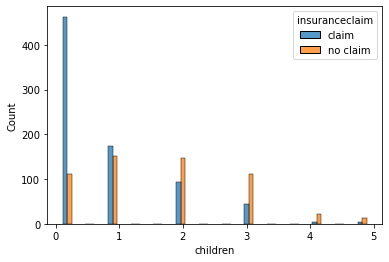

In [13]:
#children barplot
fig, ax = plt.subplots()

sns.histplot(x='children', hue='insuranceclaim', data=raw_data, multiple="dodge", ax = ax, shrink=.4)

plt.show();

fig.savefig("childrenbarplot.png")

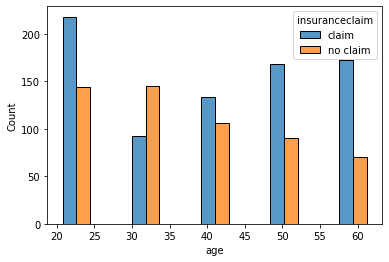

In [14]:
#age barplot
fig, ax = plt.subplots()

sns.histplot(x='age', hue='insuranceclaim', data=raw_data, multiple="dodge", ax = ax, 
             bins=np.histogram_bin_edges(raw_data.age, 5), shrink=.4)


plt.show();

fig.savefig("agebarplot.png")

In [ ]:
### Skip next cell

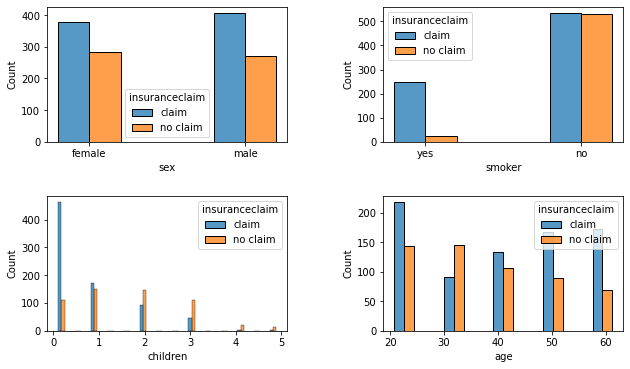

In [19]:
#Histograms of independent variables vs insuranceclaim
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.histplot(x='sex', hue='insuranceclaim', data=raw_data, multiple="dodge", ax = axes[0, 0], shrink=.4)
sns.histplot(x='smoker', hue='insuranceclaim', data=raw_data, multiple="dodge", ax = axes[0, 1], shrink=.4)
sns.histplot(x='children', hue='insuranceclaim', data=raw_data, multiple="dodge", ax = axes[1, 0], shrink=.4)
sns.histplot(x='age', hue='insuranceclaim', data=raw_data, multiple="dodge", ax = axes[1, 1], 
             bins=np.histogram_bin_edges(raw_data.age, 5), shrink=.4)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.0, 
                    wspace=0.4, 
                    hspace=0.4)

#fig.delaxes(axes[2, 1])
plt.show();

#save figure
fig.savefig("barplotsfeat.png")

In [13]:
pd.pivot_table(raw_data, index="sex", columns="insuranceclaim")

age                   bmi                 charges  \
insuranceclaim          0          1          0          1            0   
sex                                                                       
0               38.326316  40.392573  27.863140  32.278714  9400.533822   
1               36.237037  40.699507  27.901056  32.966182  8210.137078   

                              children             region              smoker  \
insuranceclaim             1         0        1         0         1         0   
sex                                                                             
0               14965.276009  1.673684  0.62069  1.547368  1.482759  0.042105   
1               17778.391097  1.688889  0.73399  1.425926  1.583744  0.048148   

                          
insuranceclaim         1  
sex                       
0               0.273210  
1               0.359606

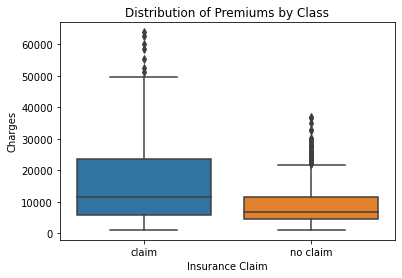

In [16]:
# Create boxplot to show the distributions of charges for both groups in the "insuranceclaim" column
fig, ax = plt.subplots()

sns.boxplot(x="insuranceclaim", y="charges", data=raw_data, ax=ax)
# Label axes
plt.xlabel("Insurance Claim")
plt.ylabel("Charges")
plt.title("Distribution of Premiums by Class")

plt.show();

fig.savefig("chargesboxplot.png")

#Generally, we can see that most policyholders who made claims were also paying higher premiums on average.

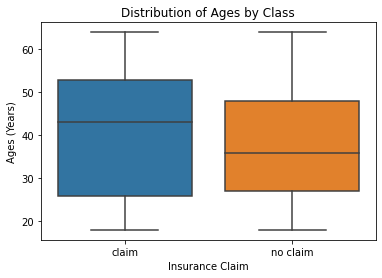

In [17]:
# Create boxplot to show distribution of ages of policyholders
fig, ax = plt.subplots()

sns.boxplot(x="insuranceclaim", y="age", data=raw_data, ax=ax)
# Label axes
plt.xlabel("Insurance Claim")
plt.ylabel("Ages (Years)")
plt.title("Distribution of Ages by Class")

plt.show();

fig.savefig("ageboxplot.png")

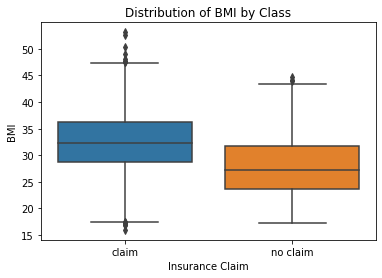

In [18]:
# Create boxplot to show distribution of ages of policyholders
fig, ax = plt.subplots()

sns.boxplot(x="insuranceclaim", y="bmi", data=raw_data, ax=ax)
# Label axes
plt.xlabel("Insurance Claim")
plt.ylabel("BMI")
plt.title("Distribution of BMI by Class")

plt.show();

fig.savefig("bmiboxplot.png")

In [ ]:
### Skip next cell

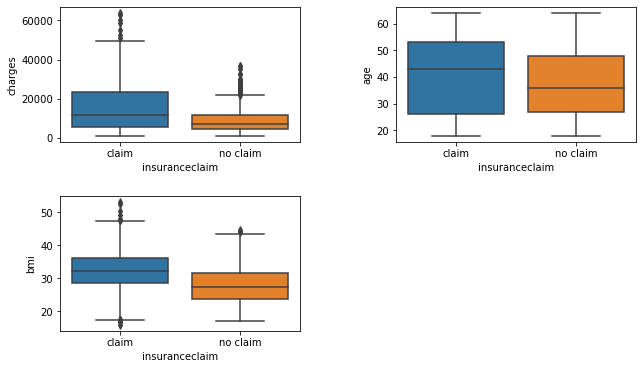

In [21]:
#Boxplot to detect outliers
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.boxplot(x="insuranceclaim", y="charges", data=raw_data, ax=axes[0, 0])
sns.boxplot(x="insuranceclaim", y="age", data=raw_data, ax=axes[0, 1])
sns.boxplot(x="insuranceclaim", y="bmi", data=raw_data, ax=axes[1, 0])

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.0, 
                    wspace=0.4, 
                    hspace=0.4)

fig.delaxes(axes[1, 1])
plt.show();

#save figure
fig.savefig("boxplotsfeat.png")

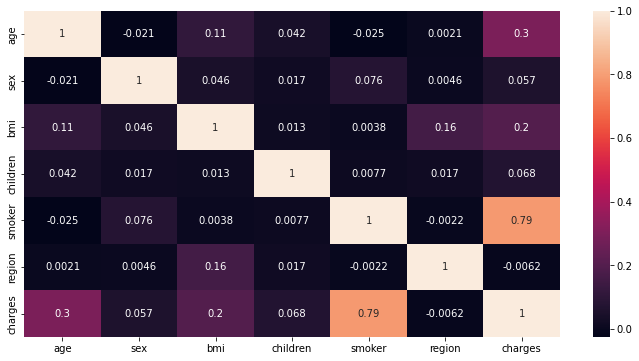

In [24]:
#correlation matrix for the data
fig, ax = plt.subplots(figsize=(12, 6))
correlation = data.select_dtypes("number").drop(columns='insuranceclaim').corr()

#Plot a heatmap to check for multicollinearity in the features except the target feature
sns.heatmap(correlation, annot=True);


#save figure
plt.savefig("correlation.png")
#There is high correlation between 'smoker' status and 'charges'

### Encoding

In [23]:
#Encode labels of categorical variables of the raw data
data = raw_data.copy()

cols = ["sex", "smoker", "region"]

data[cols] = data[cols].apply(LabelEncoder().fit_transform)

map_insuranceclaim = {'claim': 1, 'no claim': 0}
data['insuranceclaim'] = data['insuranceclaim'].map(map_insuranceclaim)
data.head()

#save head as .png
dfi.export(data.head(), "encodeddatahead.png")

### Correlation
#### Let's look at the correlation of the independent variables with our target variable

In [20]:
#correlation matrix for the data
raw_data.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [21]:
# Age vs Insurance claim
cor = pearsonr(raw_data.age, raw_data.insuranceclaim)
age_coef = round(cor[0], 4)
age_pv = round(cor[1], 6)
age_cor_stat = [age_coef, age_pv]
print("Correlation coefficient is: {}".format(round(cor[0], 4)))
print("Its p-value is: {}".format(round(cor[1], 6)))

Correlation coefficient is: 0.1137
Its p-value is: 3.1e-05


In [22]:
# Sex vs Insurance claim
cor = pearsonr(raw_data.sex, raw_data.insuranceclaim)
sex_coef = round(cor[0], 4)
sex_pv = round(cor[1], 6)
sex_cor_stat = [sex_coef, sex_pv]
print("Correlation coefficient is: {}".format(round(cor[0], 4)))
print("Its p-value is: {}".format(round(cor[1], 6)))

Correlation coefficient is: 0.0316
Its p-value is: 0.248572


In [23]:
# bmi vs Insurance claim
cor = pearsonr(raw_data.bmi, raw_data.insuranceclaim)
bmi_coef = round(cor[0], 4)
bmi_pv = round(cor[1], 6)
bmi_cor_stat = [bmi_coef, bmi_pv]
print("Correlation coefficient is: {}".format(round(cor[0], 4)))
print("Its p-value is: {}".format(round(cor[1], 6)))

Correlation coefficient is: 0.3842
Its p-value is: 0.0


In [24]:
# children vs Insurance claim
cor = pearsonr(raw_data.children, raw_data.insuranceclaim)
children_coef = round(cor[0], 4)
children_pv = round(cor[1], 6)
children_cor_stat = [children_coef, children_pv]
print("Correlation coefficient is: {}".format(round(cor[0], 4)))
print("Its p-value is: {}".format(round(cor[1], 6)))

Correlation coefficient is: -0.4095
Its p-value is: 0.0


In [25]:
# smoker vs Insurance claim
cor = pearsonr(raw_data.smoker, raw_data.insuranceclaim)
smoker_coef = round(cor[0], 4)
smoker_pv = round(cor[1], 6)
smoker_cor_stat = [smoker_coef, smoker_pv]
print("Correlation coefficient is: {}".format(round(cor[0], 4)))
print("Its p-value is: {}".format(round(cor[1], 6)))

Correlation coefficient is: 0.3333
Its p-value is: 0.0


In [26]:
# region vs Insurance claim
cor = pearsonr(raw_data.region, raw_data.insuranceclaim)
region_coef = round(cor[0], 4)
region_pv = round(cor[1], 6)
region_cor_stat = [region_coef, region_pv]
print("Correlation coefficient is: {}".format(round(cor[0], 4)))
print("Its p-value is: {}".format(round(cor[1], 6)))

Correlation coefficient is: 0.0209
Its p-value is: 0.445135


In [27]:
# charges vs Insurance claim
cor = pearsonr(raw_data.charges, raw_data.insuranceclaim)
charges_coef = round(cor[0], 4)
charges_pv = round(cor[1], 6)
charges_cor_stat = [charges_coef, charges_pv]
print("Correlation coefficient is: {}".format(round(cor[0], 4)))
print("Its p-value is: {}".format(round(cor[1], 6)))

Correlation coefficient is: 0.3094
Its p-value is: 0.0


In [28]:
#Correlation matrix of feature variables with target variable
features_target_corr = pd.DataFrame({
    "age": age_cor_stat,
    "sex": sex_cor_stat,
    "bmi": bmi_cor_stat,
    "children": children_cor_stat,
    "smoker": smoker_cor_stat,
    "region": region_cor_stat,
    "charges": charges_cor_stat
},
    index = ["Correlation coefficient with insuranceclaim", "P-value"]
)
features_target_corr

,age,sex,bmi,children,smoker,region,charges
Correlation coefficient with insuranceclaim,0.113700,0.031600,0.3842,-0.4095,0.3333,0.020900,0.3094
P-value,0.000031,0.248572,0.0000,0.0000,0.0000,0.445135,0.0000


##### From the analysis above:
- We can see that age, bmi, children, smoker and charges all have statistically significant correlation with the target variable, insuranceclaim.
- The variable 'region' has no significant correlation with insuranceclaim therefore we can drop it.

In [29]:
#Calculate the number of claims made by males and females respectively
raw_data.groupby("sex")["insuranceclaim"].sum()

# We can see that the numbers are not very different, therefore we can say males and females make equal number of claims
# We wil maintain this variable

sex
0    377
1    406
Name: insuranceclaim, dtype: int64

#### Data Preparation

In [25]:
#drop the region column
data.drop(columns=["region"], inplace=True)
data.head()

,age,sex,bmi,children,smoker,charges,insuranceclaim
0,19,0,27.900,0,1,16884.92400,1
1,18,1,33.770,1,0,1725.55230,1
2,28,1,33.000,3,0,4449.46200,0
3,33,1,22.705,0,0,21984.47061,0
4,32,1,28.880,0,0,3866.85520,1


In [30]:
#We are now set to train our different models

#### DATA PRE-PROCESSING AND SELECTION

In [26]:
#Define the independent features
X = data.loc[:, ["age", "sex", "bmi", "children", "smoker", "charges"]]
X.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [27]:
#define the target feature
y = data.insuranceclaim
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [28]:
#Normalize the data
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         0.2985838 ],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
        -0.95368917],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
        -0.72867467],
       [-0.4419476 ,  0.98959079, -1.30553108, -0.90861367, -0.5074631 ,
         0.71984298],
       [-0.51314879,  0.98959079, -0.29255641, -0.90861367, -0.5074631 ,
        -0.77680218]])

#### MODEL BUILDING
#### TRAIN THE MODELS

#### Split the data into training set and test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1070, 6) (1070,)
Test set: (268, 6) (268,)


In [30]:
y_test.value_counts()

1    175
0     93
Name: insuranceclaim, dtype: int64

# Modelling
__1. Logistic Regression__

In [31]:
#Fit a Logistic Regression model
LR_model =LogisticRegression(C=1.0, solver='newton-cg', random_state=0).fit(X_train, y_train)
LR_model

LogisticRegression(random_state=0, solver='newton-cg')

In [32]:
#Make predictions
y_hat = LR_model.predict(X_test)
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0], dtype=int64)

Mean Squared Error: 0.07835820895522388
Root Mean Squared Error: 0.2799253631867321
Accuracy score: 0.9216417910447762
Precision score: 0.9476744186046512
Recall score: 0.9314285714285714


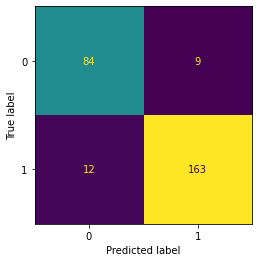

<Figure size 432x288 with 0 Axes>

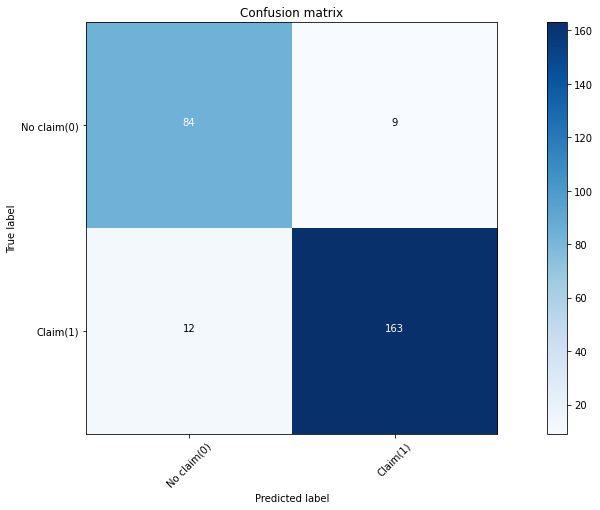

In [38]:
#Model Evaluation

# #R-Squared
# r2 = r2_score(y_test, y_hat)
# print('R-Squared:', r2)

# #MAE
# mae = mean_absolute_error(y_test, y_hat)
# print('Mean Absolute Error:', mae)

#mse
mse = mean_squared_error(y_test, y_hat)
print('Mean Squared Error:', mse)

#rmse
rmse = mean_squared_error(y_test, y_hat, squared=False)
print('Root Mean Squared Error:', rmse)

#accuracy score
acc_score = accuracy_score(y_test, y_hat)
print('Accuracy score:', acc_score)

#precision score
pre_score = precision_score(y_test, y_hat)
print('Precision score:', pre_score)

#recall score
rec_score = recall_score(y_test, y_hat)
print('Recall score:', rec_score)

#create a list of the metrics 
LR_model_metrics = [mse, rmse, acc_score, pre_score, rec_score]
LR_model_metrics

#create a dataframe of the metrics
LR_metrics = pd.DataFrame(LR_model_metrics, 
                          index=["MSE", "RMSE", "Accuracy score", "Precision score", "Recall score"], 
                          columns=["Score"])
LR_metrics
#Save it as a table
dfi.export(LR_metrics, "LR_metrics.png")

#plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(LR_model, X_test, y_test, colorbar=False);

# Plot non-normalized confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, axes = plt.subplots(figsize=(14, 7))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=['No claim(0)','Claim(1)'],normalize= False,  title='Confusion matrix')
plt.savefig("LR Confusion Matrix")

__2. Support Vector Machines__

In [40]:
#Train model
SVM_model = svm.SVC(kernel='poly', random_state=0)
SVM_model.fit(X_train, y_train) 
SVM_model

SVC(kernel='poly', random_state=0)

In [41]:
#make predictions
y_hat = SVM_model.predict(X_test)
y_hat

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0], dtype=int64)

Mean Squared Error: 0.06343283582089553
Root Mean Squared Error: 0.2518587616520329
Accuracy score: 0.9365671641791045
Precision score: 0.9759036144578314
Recall score: 0.9257142857142857


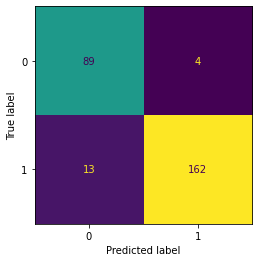

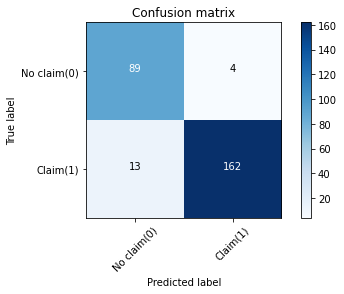

In [42]:
#Model Evaluation

# #R-Squared
# r2 = r2_score(y_test, y_hat)
# print('R-Squared:', r2)

# #MAE
# mae = mean_absolute_error(y_test, y_hat)
# print('Mean Absolute Error:', mae)

#mse
mse = mean_squared_error(y_test, y_hat)
print('Mean Squared Error:', mse)

#rmse
rmse = mean_squared_error(y_test, y_hat, squared=False)
print('Root Mean Squared Error:', rmse)

#accuracy score
acc_score = accuracy_score(y_test, y_hat)
print('Accuracy score:', acc_score)

#precision score
pre_score = precision_score(y_test, y_hat)
print('Precision score:', pre_score)

#recall score
rec_score = recall_score(y_test, y_hat)
print('Recall score:', rec_score)

#create a list of the metrics 
SVM_model_metrics = [mse, rmse, acc_score, pre_score, rec_score]
SVM_model_metrics

#create a dataframe of the metrics
SVM_metrics = pd.DataFrame(SVM_model_metrics, 
                          index=["MSE", "RMSE", "Accuracy score", "Precision score", "Recall score"], 
                          columns=["Score"])
SVM_metrics
#Save it as a table
dfi.export(SVM_metrics, "SVM_metrics.png")

#plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(SVM_model, X_test, y_test, colorbar=False);

# Plot non-normalized confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=['No claim(0)','Claim(1)'],normalize= False,  title='Confusion matrix')
plt.savefig("SVM Confusion Matrix")

In [34]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        93
           1       0.98      0.93      0.95       175

    accuracy                           0.94       268
   macro avg       0.92      0.94      0.93       268
weighted avg       0.94      0.94      0.94       268



__3. Random Forest__

#### __Ensemble models__ work by building multiple models on random subsets of the same data, and then comparing their predictions to make a final prediction. We're going to create an ensemble of trees here. This type of model is called a __random forest__.

In [35]:
#Create a validation set for hyperparameter tuning
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_tr.shape)
print(X_val.shape)

(856, 6)
(214, 6)


In [43]:
#Random Forest Classification function
#Hyperparameter tuning
def rf(k):
    model = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=k, random_state=0)
    return model

for k in range(1, 21):
    model = rf(k)
    model.fit(X_tr, y_tr)
    
    y_pred = model.predict(X_val)
    
    #evaluation
    print(k)
    print(mean_squared_error(y_val, y_pred))
    print(accuracy_score(y_val, y_pred))
    print('\n')

1
-0.2361148138274236
0.3037383177570093
0.3037383177570093
0.6962616822429907


2
0.39145116857726836
0.14953271028037382
0.14953271028037382
0.8504672897196262


3
0.6196569803607928
0.09345794392523364
0.09345794392523364
0.9065420560747663


4
0.6767084333066737
0.0794392523364486
0.0794392523364486
0.9205607476635514


5
0.7527770372345153
0.06074766355140187
0.06074766355140187
0.9392523364485982


6
0.7527770372345153
0.06074766355140187
0.06074766355140187
0.9392523364485982


7
0.8098284901803964
0.04672897196261682
0.04672897196261682
0.9532710280373832


8
0.8858970941082378
0.028037383177570093
0.028037383177570093
0.9719626168224299


9
0.9429485470541189
0.014018691588785047
0.014018691588785047
0.985981308411215


10
0.9429485470541189
0.014018691588785047
0.014018691588785047
0.985981308411215


11
0.9429485470541189
0.014018691588785047
0.014018691588785047
0.985981308411215


12
0.9049142450901981
0.02336448598130841
0.02336448598130841
0.9766355140186916


13
0.94294

In [43]:
#initiate the model
RF_model = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=10, random_state=0)

#fit the model
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, oob_score=True, random_state=0)

In [44]:
#make predictions
y_hat = RF_model.predict(X_test)
y_hat

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0], dtype=int64)

R-Squared: 0.9176651305683564
Mean Absolute Error: 0.018656716417910446
Mean Squared Error: 0.018656716417910446
Root Mean Squared Error: 0.13658959117703826
Accuracy score: 0.9813432835820896
Precision score: 0.9885057471264368
Recall score: 0.9828571428571429


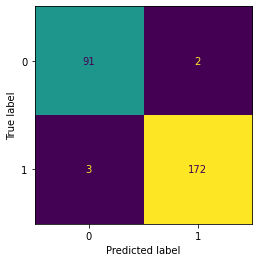

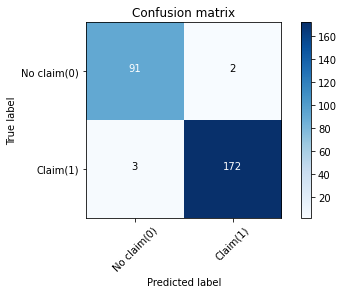

In [45]:
#model evaluation
# #R-Squared
# r2 = r2_score(y_test, y_hat)
# print('R-Squared:', r2)

# #MAE
# mae = mean_absolute_error(y_test, y_hat)
# print('Mean Absolute Error:', mae)

#mse
mse = mean_squared_error(y_test, y_hat)
print('Mean Squared Error:', mse)

#rmse
rmse = mean_squared_error(y_test, y_hat, squared=False)
print('Root Mean Squared Error:', rmse)

#accuracy score
acc_score = accuracy_score(y_test, y_hat)
print('Accuracy score:', acc_score)

#precision score
pre_score = precision_score(y_test, y_hat)
print('Precision score:', pre_score)

#recall score
rec_score = recall_score(y_test, y_hat)
print('Recall score:', rec_score)

#create a list of the metrics 
RF_model_metrics = [mse, rmse, acc_score, pre_score, rec_score]
RF_model_metrics

#create a dataframe of the metrics
RF_metrics = pd.DataFrame(RF_model_metrics, 
                          index=["MSE", "RMSE", "Accuracy score", "Precision score", "Recall score"], 
                          columns=["Score"])
RF_metrics
#Save it as a table
dfi.export(RF_metrics, "RF_metrics.png")

#plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(RF_model, X_test, y_test, colorbar=False);

# Plot non-normalized confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=['No claim(0)','Claim(1)'],normalize= False,  title='Confusion matrix')
plt.savefig("RF Confusion Matrix")

In [39]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        93
           1       0.99      0.98      0.99       175

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



__4. Gradient Boosting Trees__

In [47]:
#Gradient Boosting Trees Classification function
#Hyperparameter tuning
def rf(k):
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=k, random_state=0)
    return model

for k in range(1, 11):
    model = rf(k)
    model.fit(X_tr, y_tr)
    
    y_pred = model.predict(X_val)
    
    #evaluation
    print(k)
    print(mean_squared_error(y_val, y_pred))
    print(accuracy_score(y_val, y_pred))
    print('\n')

1
0.4865369234870701
0.1261682242990654
0.1261682242990654
0.8738317757009346


2
0.8478627921443171
0.037383177570093455
0.037383177570093455
0.9626168224299065


3
0.9429485470541189
0.014018691588785047
0.014018691588785047
0.985981308411215


4
0.9619656980360792
0.009345794392523364
0.009345794392523364
0.9906542056074766


5
0.9429485470541189
0.014018691588785047
0.014018691588785047
0.985981308411215


6
0.9619656980360792
0.009345794392523364
0.009345794392523364
0.9906542056074766


7
0.9429485470541189
0.014018691588785047
0.014018691588785047
0.985981308411215


8
0.9429485470541189
0.014018691588785047
0.014018691588785047
0.985981308411215


9
0.9429485470541189
0.014018691588785047
0.014018691588785047
0.985981308411215


10
0.9429485470541189
0.014018691588785047
0.014018691588785047
0.985981308411215




In [48]:
#instantiate the model
GBT_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=4, random_state=0)

#fit model
GBT_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, random_state=0)

In [49]:
#make predictions
y_hat = GBT_model.predict(X_test)
y_hat

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0], dtype=int64)

Mean Squared Error: 0.014925373134328358
Root Mean Squared Error: 0.12216944435630522
Accuracy score: 0.9850746268656716
Precision score: 0.9830508474576272
Recall score: 0.9942857142857143


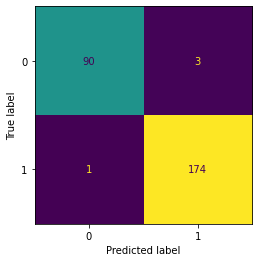

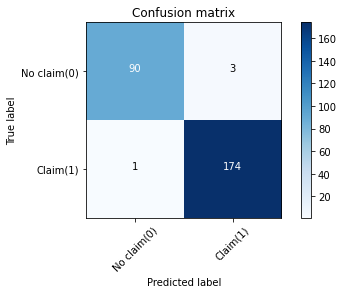

In [50]:
#model evaluation
# #R-Squared
# r2 = r2_score(y_test, y_hat)
# print('R-Squared:', r2)

# #MAE
# mae = mean_absolute_error(y_test, y_hat)
# print('Mean Absolute Error:', mae)

#mse
mse = mean_squared_error(y_test, y_hat)
print('Mean Squared Error:', mse)

#rmse
rmse = mean_squared_error(y_test, y_hat, squared=False)
print('Root Mean Squared Error:', rmse)

#accuracy score
acc_score = accuracy_score(y_test, y_hat)
print('Accuracy score:', acc_score)

#precision score
pre_score = precision_score(y_test, y_hat)
print('Precision score:', pre_score)

#recall score
rec_score = recall_score(y_test, y_hat)
print('Recall score:', rec_score)

#create a list of the metrics 
GBT_model_metrics = [mse, rmse, acc_score, pre_score, rec_score]
GBT_model_metrics

#create a dataframe of the metrics
GBT_metrics = pd.DataFrame(GBT_model_metrics, 
                          index=["MSE", "RMSE", "Accuracy score", "Precision score", "Recall score"], 
                          columns=["Score"])
LR_metrics
#Save it as a table
dfi.export(GBT_metrics, "GBT_metrics.png")

#plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(GBT_model, X_test, y_test, colorbar=False);

# Plot non-normalized confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=['No claim(0)','Claim(1)'],normalize= False,  title='Confusion matrix')
plt.savefig("GBT Confusion Matrix")

In [43]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        93
           1       0.98      0.99      0.99       175

    accuracy                           0.99       268
   macro avg       0.99      0.98      0.98       268
weighted avg       0.99      0.99      0.99       268



In [60]:
# Plot non-normalized confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=['No claim(0)','Claim(1)'],normalize= False,  title='Confusion matrix')
plt.savefig("GBT Confusion Matrix")

#### EVALUATION METRICS

In [51]:
#Dataframe of evaluation metrics for all the models
evaluation_metrics_df = pd.DataFrame(
    {
    'Logistic Regression': LR_model_metrics,
    'Support Vector Machines': SVM_model_metrics,
    'Random Forest': RF_model_metrics,
    'Gradient Boosting Trees': GBT_model_metrics
    },
    index = ['Mean Squared Error', 'Root Mean Squared Error', 'Accuracy Score', 'Precision Score', 'Recall Score']
)

evaluation_metrics_df

#Save it as a table
dfi.export(evaluation_metrics_df, "summary_evaluation_metrics.png")

In [52]:
evaluation_metrics_df

,Logistic Regression,Support Vector Machines,Random Forest,Gradient Boosting Trees
Mean Squared Error,0.078358,0.063433,0.018657,0.014925
Root Mean Squared Error,0.279925,0.251859,0.136590,0.122169
Accuracy Score,0.921642,0.936567,0.981343,0.985075
Precision Score,0.947674,0.975904,0.988506,0.983051
Recall Score,0.931429,0.925714,0.982857,0.994286


#### From the analysis above, our best model is the __Gradient Boosting Trees  model__ which has the following metrics:
- Mean Squared Error: 0.0149
- Root Mean Squared Error: 0.1222
- Accuracy Score: 0.9851(98.51%)
- Precision Score: 0.9830
- Recall Score: 0.9943

- The Recall score is 0.9943 which shows that our model predicted 99.43% of the positives correctly, i.e. our true positive rate is 99.43%. The model is therefore a good fit in predicting insurance claims.

In [53]:
#Number of Claims to expect from a set of 268 policies
claims = y_hat.sum()
claims

177

- To find the number of claims the insurer should expect from the insured risks, we aggregate the predictions from our model.
- This gives us:
> __From 268 policies, the insurer should expect 177 claims to be made.__

In [ ]:
#Check the most importance features that our model is looking at when making predictions
#Bar plot of feature importances